In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [113]:
df = pd.read_excel('data/ENB2012_data.xlsx')

In [114]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [115]:
df = df.rename(columns=column_names)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def vibe_check(X, y):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    fig = plt.figure(figsize=(16,16))
    fig.suptitle('Residual Analysis', fontsize=20)  # Add title here
    
    residuals = y_test - y_pred
    
    # Colinearity
    plt.subplot(2,2,1)
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Colinearity Check')

    # Plot histogram of residuals
    plt.subplot(2,2,2)
    sns.histplot(residuals, kde=True, bins=10)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Plot QQ plot of residuals
    plt.subplot(2,2,3)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('QQ Plot of Residuals')
    plt.grid(True)

    # Check homoscedasticity using predicted values and residuals
    plt.subplot(2,2,4)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()   

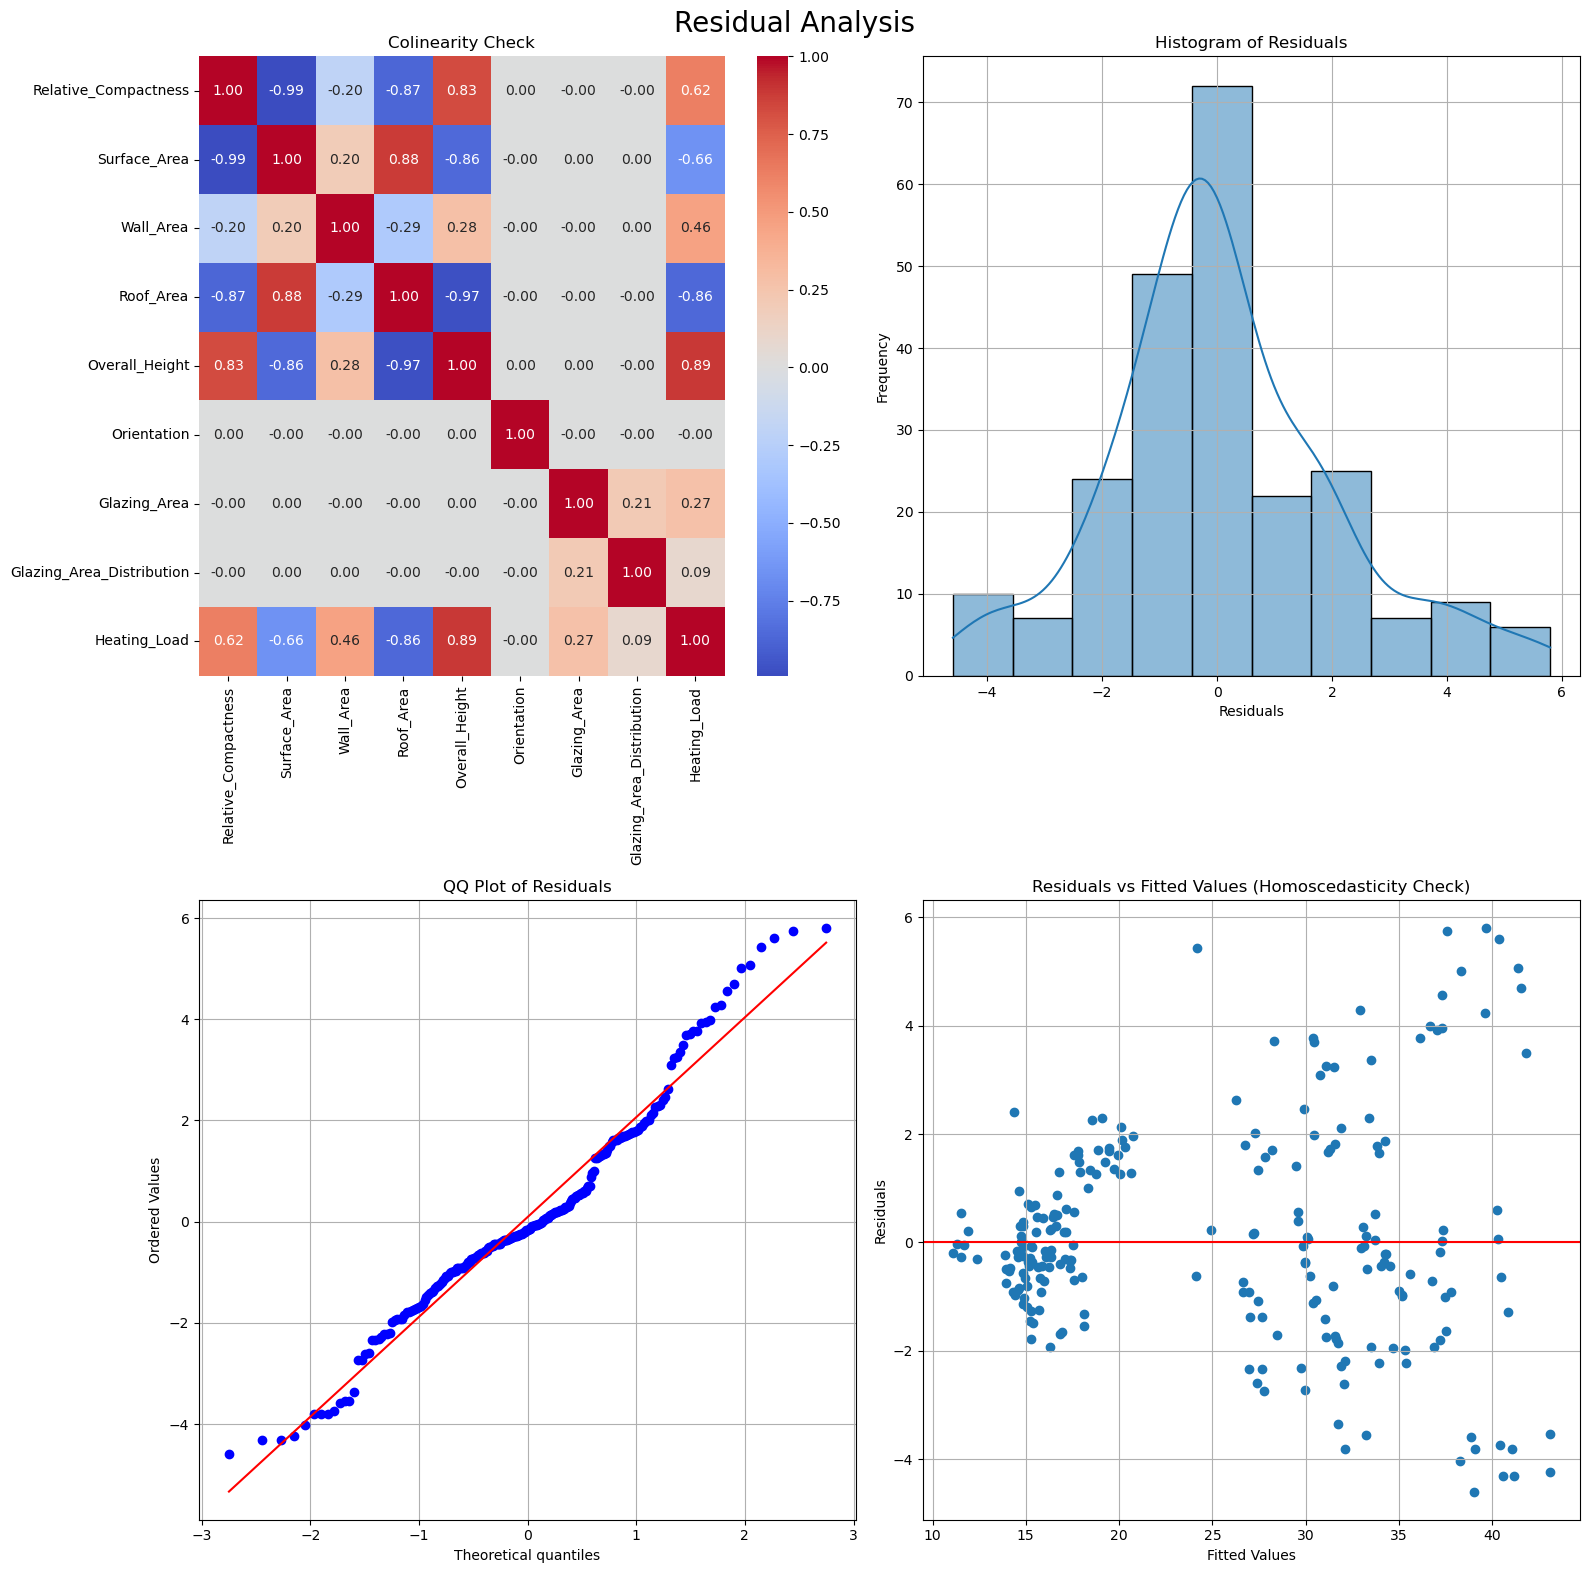

In [128]:
X = df.drop('Cooling_Load', axis=1)
y = df['Cooling_Load']

vibe_check(X, y)